In [31]:
import torch
from torch import nn
import  matplotlib.pyplot as plt

In [32]:
torch.__version__

'2.5.1'

In [33]:
# prepare and load data
#known parameters
w = 2.0
b =  3.0

def f(x):
    return w*x + b

In [34]:
X = torch.arange(1,21)

X

tensor([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
        19, 20])

In [35]:
f(X)

tensor([ 5.,  7.,  9., 11., 13., 15., 17., 19., 21., 23., 25., 27., 29., 31.,
        33., 35., 37., 39., 41., 43.])

In [37]:
# create a  split

train_size = int(0.8 * len(X))
train_size
X_train, y_train = X[:train_size], f(X[:train_size])
X_test, y_test = X[train_size:], f(X[train_size:])

In [38]:
len(X_train), len(X_test)  

(16, 4)

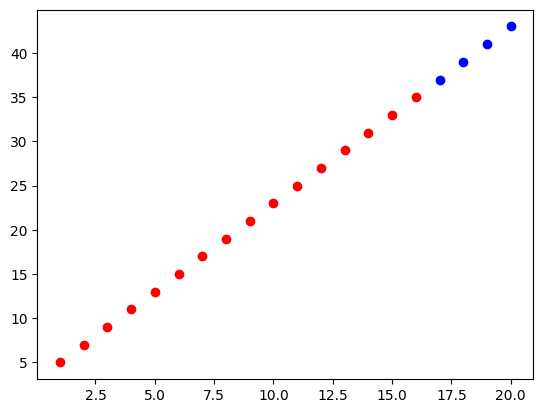

In [39]:
plt.scatter(X_train,y_train, c="r")
plt.scatter(X_test,y_test, c="b")

In [42]:
def plot_prediction(X_train=X_train, y_train=y_train, X_test=X_test, y_test=y_test, y_pred=None):
    plt.scatter(X_train, y_train, c='b', label='train')
    plt.scatter(X_test, y_test, c='r', label='test')
    if y_pred is not None:
        plt.scatter(X_test, y_pred, c='r', label='prediction')
    plt.legend()

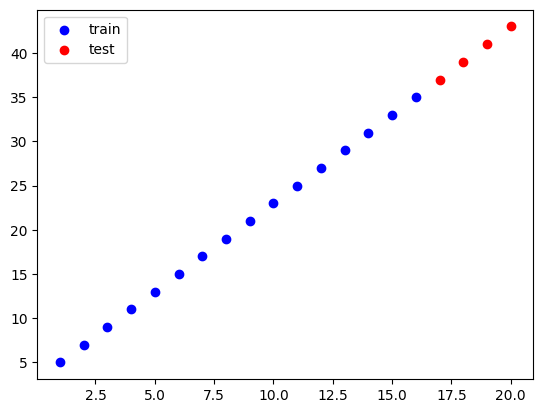

In [43]:
plot_prediction()

In [50]:
from torch import nn

class LinearNetwrok(nn.Module):
    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.rand(1, dtype=torch.float32), requires_grad=True)
        self.bias = nn.Parameter(torch.randn(1, # <- start with random bias (this will get adjusted as the model learns)
                                            dtype=torch.float), # <- PyTorch loves float32 by default
                                requires_grad=True)
        
    def forward(self, x:torch.Tensor):
        return self.weights * x + self.bias

In [51]:
model = LinearNetwrok()

In [55]:
list(model.parameters())

[Parameter containing:
 tensor([0.2446], requires_grad=True),
 Parameter containing:
 tensor([-1.2865], requires_grad=True)]

In [54]:
model.state_dict()

OrderedDict([('weights', tensor([0.2446])), ('bias', tensor([-1.2865]))])

In [56]:
model(X_train)

tensor([-1.0419, -0.7973, -0.5528, -0.3082, -0.0636,  0.1809,  0.4255,  0.6701,
         0.9147,  1.1592,  1.4038,  1.6484,  1.8929,  2.1375,  2.3821,  2.6266],
       grad_fn=<AddBackward0>)

In [58]:
with torch.no_grad():
    print(model(X_train))


tensor([-1.0419, -0.7973, -0.5528, -0.3082, -0.0636,  0.1809,  0.4255,  0.6701,
         0.9147,  1.1592,  1.4038,  1.6484,  1.8929,  2.1375,  2.3821,  2.6266])


tensor([-1.0419, -0.7973, -0.5528, -0.3082, -0.0636,  0.1809,  0.4255,  0.6701,
         0.9147,  1.1592,  1.4038,  1.6484,  1.8929,  2.1375,  2.3821,  2.6266])


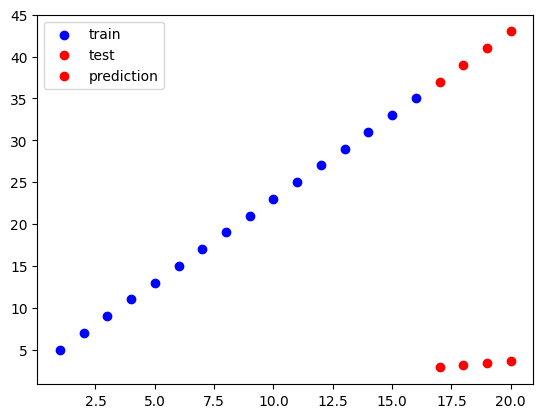

In [63]:
with torch.inference_mode():
    print(model(X_train))
    plot_prediction(y_pred=model(X_test))

In [64]:
# loss

loss_fn = nn.L1Loss()
optimzer = torch.optim.SGD(model.parameters(), lr=0.001)

In [71]:
sam = torch.arange(1,11).unsqueeze(dim=1)

sam

tensor([[ 1],
        [ 2],
        [ 3],
        [ 4],
        [ 5],
        [ 6],
        [ 7],
        [ 8],
        [ 9],
        [10]])

In [72]:
sam.shape

torch.Size([10, 1])